In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Mar 20 11:51:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    46W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/gdrive")

Mounted at /gdrive


In [ ]:
aisles = pd.read_csv('/content/drive/MyDrive/archive (4)/aisles.csv')
depart = pd.read_csv('/content/drive/MyDrive/archive (4)/departments.csv')
orderprior = pd.read_csv('/content/drive/MyDrive/archive (4)/order_products__prior.csv')
ordertrain = pd.read_csv('/content/drive/MyDrive/archive (4)/order_products__train.csv')
order = pd.read_csv('/content/drive/MyDrive/archive (4)/orders.csv')
product  = pd.read_csv('/content/drive/MyDrive/archive (4)/products.csv')

In [ ]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [ ]:
depart

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
orderprior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [ ]:
ordertrain

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [ ]:
ordertrain.tail(10)

,order_id,product_id,add_to_cart_order,reordered
1384607,3421058,30316,6,1
1384608,3421058,35578,7,0
1384609,3421058,32650,8,1
1384610,3421063,49235,1,1
1384611,3421063,13565,2,1
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [ ]:
order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
product

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
ordersum = pd.concat([orderprior, ordertrain], ignore_index=True)
ordersum

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
33819101,3421063,14233,3,1
33819102,3421063,35548,4,1
33819103,3421070,35951,1,1
33819104,3421070,16953,2,1


In [ ]:
or_orsum = pd.merge(order, ordersum, on = 'order_id', how = 'left')
or_orsum

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
33894101,272231,206209,train,14,6,14,30.0,40603.0,4.0,0.0
33894102,272231,206209,train,14,6,14,30.0,15655.0,5.0,0.0
33894103,272231,206209,train,14,6,14,30.0,42606.0,6.0,0.0
33894104,272231,206209,train,14,6,14,30.0,37966.0,7.0,0.0


In [ ]:
ordersum1 = pd.merge(or_orsum, product, on = 'product_id', how = 'left')
ordersum1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33894101,272231,206209,train,14,6,14,30.0,40603.0,4.0,0.0,Fabric Softener Sheets,75.0,17.0
33894102,272231,206209,train,14,6,14,30.0,15655.0,5.0,0.0,Dark Chocolate Mint Snacking Chocolate,45.0,19.0
33894103,272231,206209,train,14,6,14,30.0,42606.0,6.0,0.0,Phish Food Frozen Yogurt,37.0,1.0
33894104,272231,206209,train,14,6,14,30.0,37966.0,7.0,0.0,French Baguette Bread,112.0,3.0


In [ ]:
ordersum2 = pd.merge(ordersum1, depart, on = 'department_id', how = 'left')
ordersum2

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,add_to_cart_order_cnt,department
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,1.0,beverages
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,2.0,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,3.0,snacks
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.0,snacks
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,5.0,household
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33894101,272231,206209,train,14,6,14,30.0,40603.0,4.0,0.0,Fabric Softener Sheets,75.0,17.0,4.0,household
33894102,272231,206209,train,14,6,14,30.0,15655.0,5.0,0.0,Dark Chocolate Mint Snacking Chocolate,45.0,19.0,5.0,snacks
33894103,272231,206209,train,14,6,14,30.0,42606.0,6.0,0.0,Phish Food Frozen Yogurt,37.0,1.0,6.0,frozen
33894104,272231,206209,train,14,6,14,30.0,37966.0,7.0,0.0,French Baguette Bread,112.0,3.0,7.0,bakery


In [ ]:
or_orsum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33894106 entries, 0 to 33894105
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              float64
 8   add_to_cart_order       float64
 9   reordered               float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.8+ GB


In [ ]:
ordertop20 = ordersum1.product_name.value_counts().head(20)
ordertop20

Banana                      491291
Bag of Organic Bananas      394930
Organic Strawberries        275577
Organic Baby Spinach        251705
Organic Hass Avocado        220877
Organic Avocado             184224
Large Lemon                 160792
Strawberries                149445
Limes                       146660
Organic Whole Milk          142813
Organic Raspberries         142603
Organic Yellow Onion        117716
Organic Garlic              113936
Organic Zucchini            109412
Organic Blueberries         105026
Cucumber Kirby               99728
Organic Fuji Apple           92889
Organic Lemon                91251
Organic Grape Tomatoes       88078
Apple Honeycrisp Organic     87272
Name: product_name, dtype: int64

In [ ]:
ordersum1[ordersum1['product_name'] == 'Organic Hass Avocado']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
102,738281,2,prior,4,2,10,8.0,47209.0,9.0,0.0,Organic Hass Avocado,24.0,4.0
129,1199898,2,prior,6,2,9,13.0,47209.0,10.0,1.0,Organic Hass Avocado,24.0,4.0
147,3194192,2,prior,7,2,12,14.0,47209.0,7.0,1.0,Organic Hass Avocado,24.0,4.0
160,788338,2,prior,8,1,15,27.0,47209.0,6.0,1.0,Organic Hass Avocado,24.0,4.0
199,1447487,2,prior,10,1,11,6.0,47209.0,3.0,1.0,Organic Hass Avocado,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33891896,1909878,206200,prior,23,0,19,1.0,47209.0,7.0,1.0,Organic Hass Avocado,24.0,4.0
33891927,943915,206200,train,24,6,19,6.0,47209.0,8.0,1.0,Organic Hass Avocado,24.0,4.0
33893212,1357124,206207,prior,10,3,11,16.0,47209.0,15.0,0.0,Organic Hass Avocado,24.0,4.0
33893269,2991173,206207,prior,15,5,10,7.0,47209.0,15.0,1.0,Organic Hass Avocado,24.0,4.0


In [ ]:
ordersum1.department_id.value_counts()

4.0     9888378
16.0    5631067
19.0    3006412
7.0     2804175
1.0     2336858
13.0    1956819
3.0     1225181
15.0    1114857
20.0    1095540
9.0      905340
17.0     774652
12.0     739238
14.0     739069
11.0     468693
18.0     438743
6.0      281155
5.0      159294
8.0      102221
21.0      77396
2.0       38086
10.0      35932
Name: department_id, dtype: int64

In [ ]:
or_orsum.reordered.sum() / or_orsum.shape[0] #재주문율 확인, 59%

0.5887560509783029

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


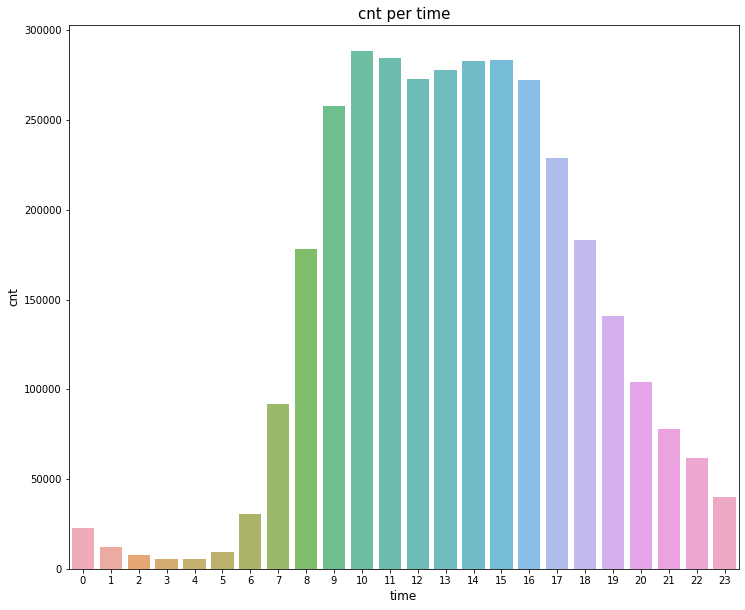

In [ ]:
ordertime = order.order_hour_of_day.value_counts() #시간대 별 구매량 확인
plt.figure(figsize = (12,10))
sns.barplot(ordertime.index, ordertime.values, alpha = 0.8)
plt.ylabel('cnt', fontsize = 12)
plt.xlabel('time', fontsize = 12)
plt.title('cnt per time', fontsize = 15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


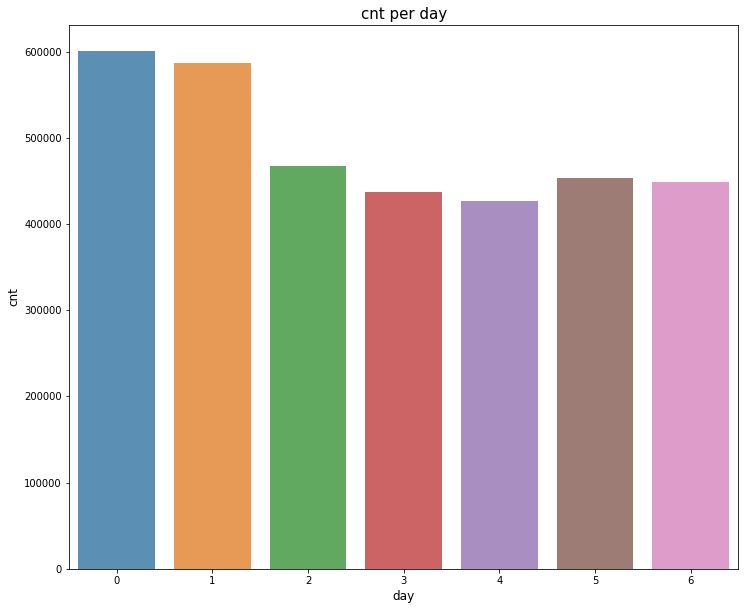

In [ ]:
orderday = order.order_dow.value_counts() #요일 별 주문량 확인
plt.figure(figsize = (12,10))
sns.barplot(orderday.index, orderday.values, alpha = 0.8)
plt.ylabel('cnt', fontsize = 12)
plt.xlabel('day', fontsize = 12)
plt.title('cnt per day', fontsize = 15)
plt.show()

In [ ]:
day0 = or_orsum[or_orsum['order_dow']==0]
day1 = or_orsum[or_orsum['order_dow']==1]
day2 = or_orsum[or_orsum['order_dow']==2]
day3 = or_orsum[or_orsum['order_dow']==3]
day4 = or_orsum[or_orsum['order_dow']==4]
day5 = or_orsum[or_orsum['order_dow']==5]
day6 = or_orsum[or_orsum['order_dow']==6]

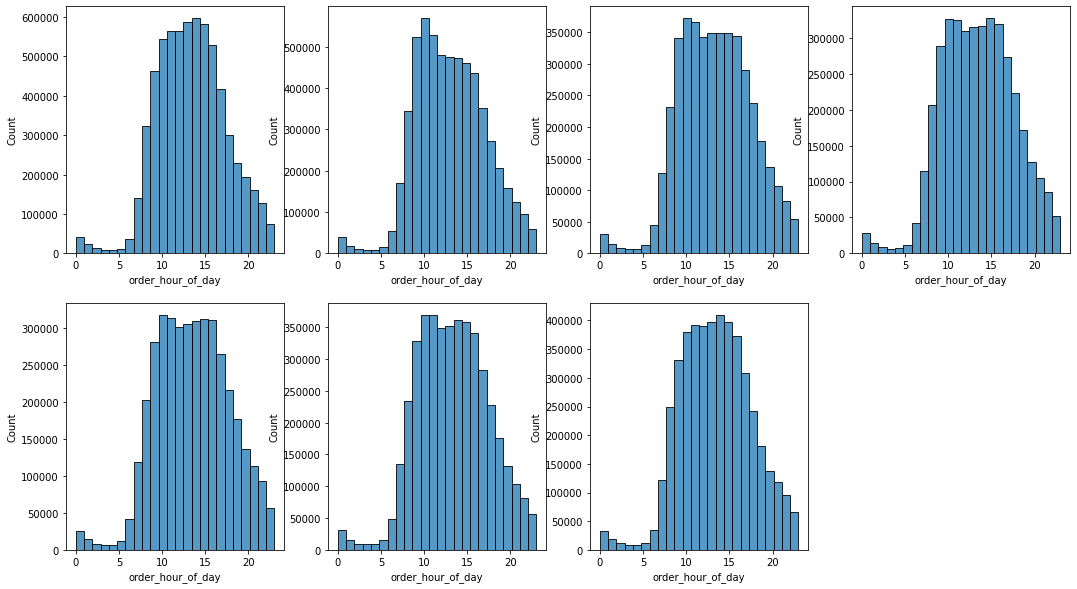

In [ ]:
plt.figure(figsize=(18, 10)) #요일 별 주문 시간대 확인
## day0
plt.subplot(2,4,1)
day0_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day0)

##day1
plt.subplot(2,4,2)
day1_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day1)

## day2
plt.subplot(2,4,3)
day2_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day2)

## day3
plt.subplot(2,4,4)
day3_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day3)

## day4
plt.subplot(2,4,5)
day4_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day4)

## day5
plt.subplot(2,4,6)
day5_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day5)

## day6
plt.subplot(2,4,7)
day6_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day6)

plt.show()

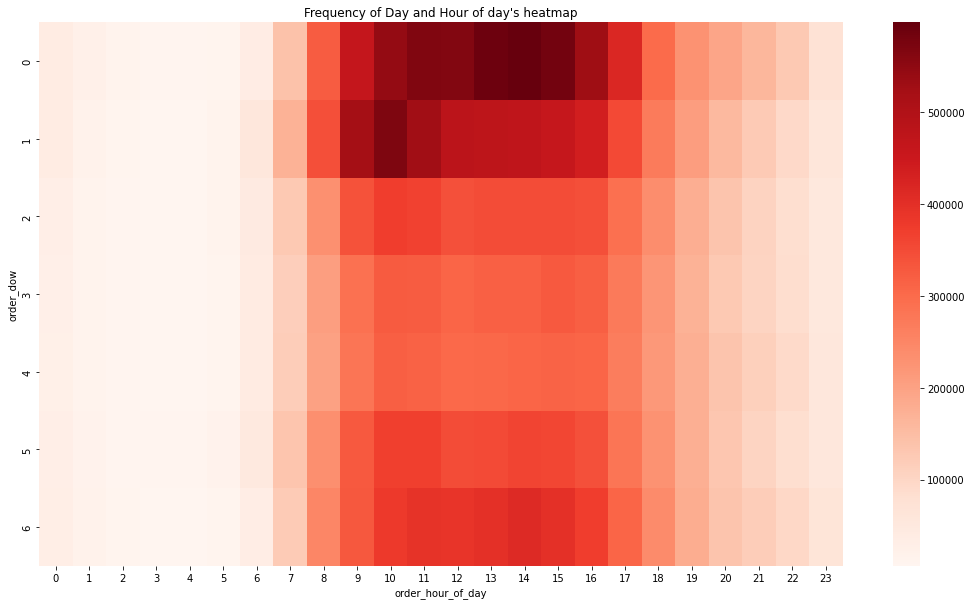

In [ ]:
orgroup = or_orsum.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
orgroup = orgroup.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(18,10))
sns.heatmap(orgroup, cmap = 'Reds')
plt.title("Frequency of Day and Hour of day's heatmap")
plt.show()

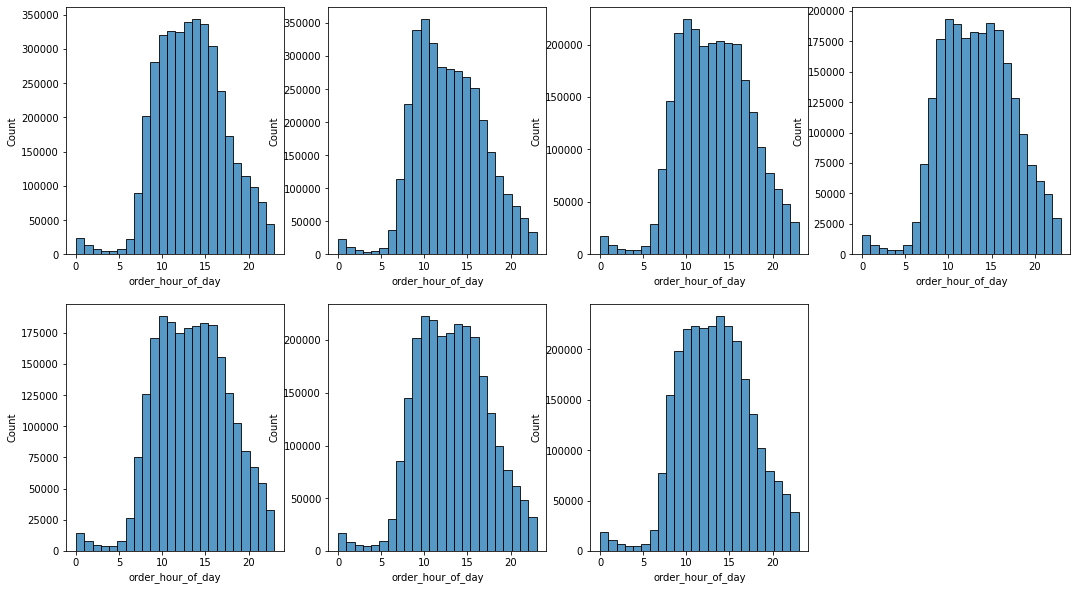

In [ ]:
plt.figure(figsize=(18, 10)) #요일 별 재주문 시간대 확인
## day0
plt.subplot(2,4,1)
day0_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day0[day0['reordered']==1])

##day1
plt.subplot(2,4,2)
day1_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day1[day1['reordered']==1])

## day2
plt.subplot(2,4,3)
day2_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day2[day2['reordered']==1])

## day3
plt.subplot(2,4,4)
day3_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day3[day3['reordered']==1])

## day4
plt.subplot(2,4,5)
day4_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day4[day4['reordered']==1])

## day5
plt.subplot(2,4,6)
day5_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day5[day5['reordered']==1])

## day6
plt.subplot(2,4,7)
day6_hist = sns.histplot(x='order_hour_of_day',bins=24,data=day6[day6['reordered']==1])

plt.show()

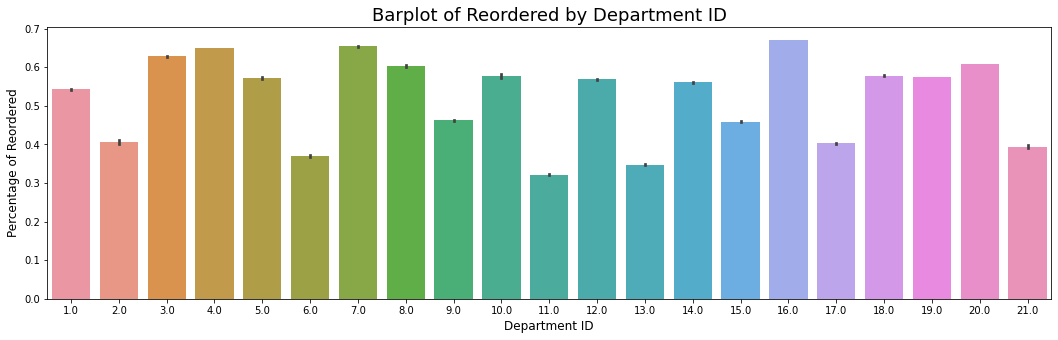

In [ ]:
plt.figure(figsize=(18,5))
dep_bar = sns.barplot(x='department_id',
                      y='reordered',
                      data=ordersum1)

dep_bar.set_xlabel('Department ID', fontsize=12)
dep_bar.set_ylabel('Percentage of Reordered', fontsize=12)
dep_bar.set_title('Barplot of Reordered by Department ID', fontsize=18)
plt.show()

In [ ]:
ordersum1.product_id.value_counts()

24852.0    491291
13176.0    394930
21137.0    275577
21903.0    251705
47209.0    220877
            ...  
36233.0         1
3117.0          1
41967.0         1
43098.0         1
28818.0         1
Name: product_id, Length: 49685, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


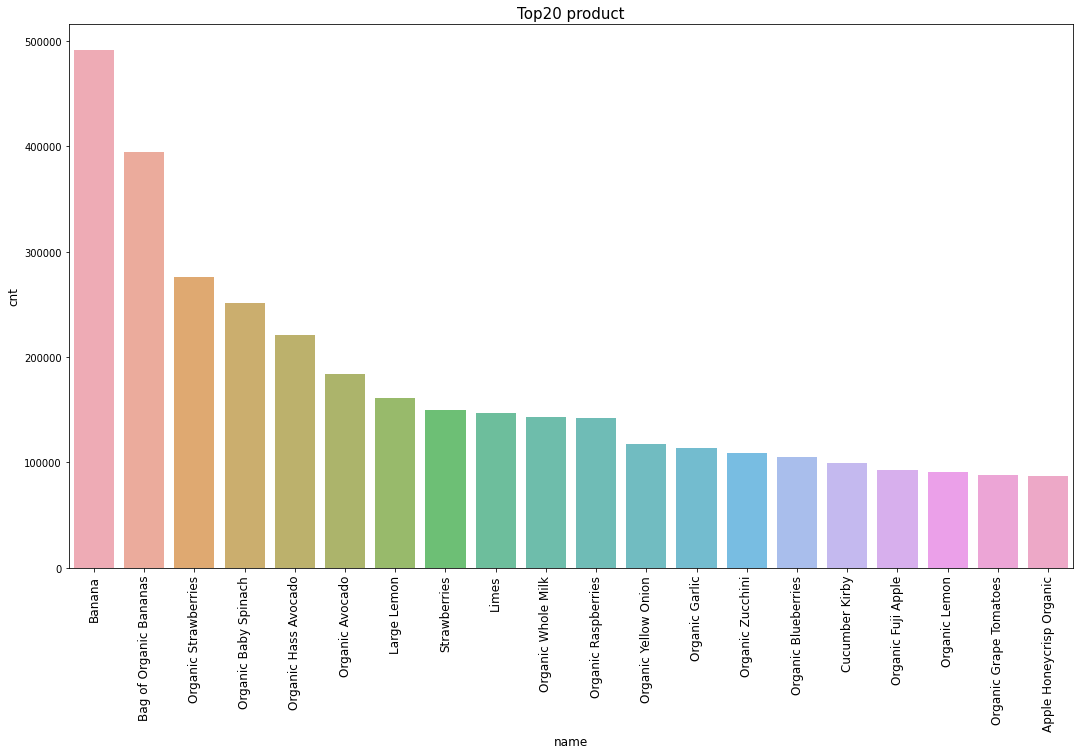

In [ ]:
plt.figure(figsize = (18,10))
sns.barplot(ordertop20.index, ordertop20.values, alpha = 0.8)
plt.ylabel('cnt', fontsize = 12)
plt.xlabel('name', fontsize = 12)
plt.xticks(fontsize = 12, rotation = 'vertical')
plt.title('Top20 product', fontsize = 15)
plt.show()

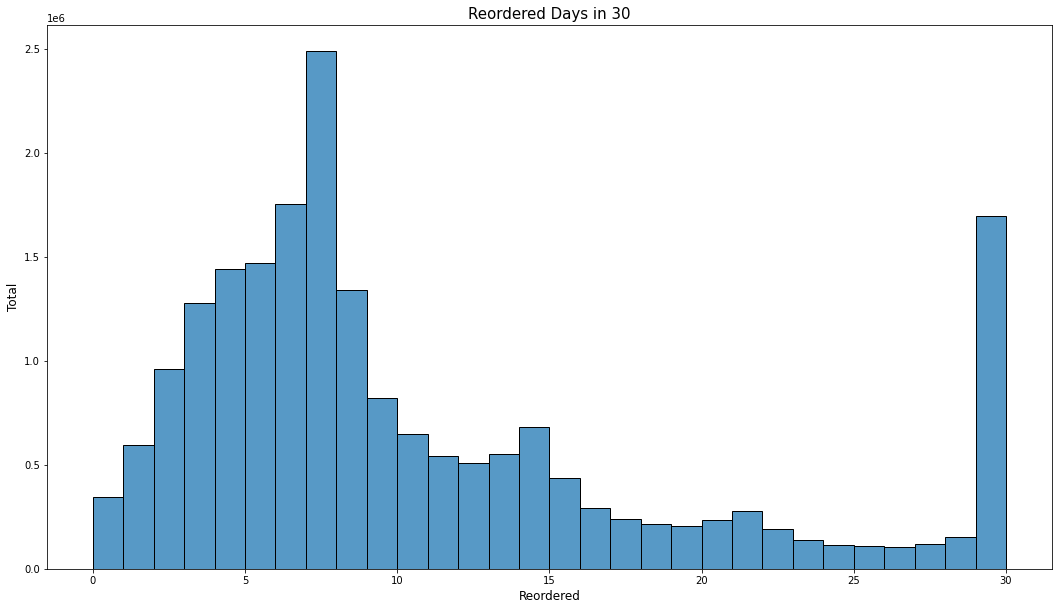

In [ ]:
reorder = ordersum1[ordersum1['reordered']==1]

plt.figure(figsize=(18,10))
dep_hist = sns.histplot(x='days_since_prior_order',
                        bins=30,
                        data=reorder)

dep_hist.set_xlabel('Reordered', fontsize=12)
dep_hist.set_ylabel('Total', fontsize=12)
dep_hist.set_title('Reordered Days in 30', fontsize=15)
plt.show()

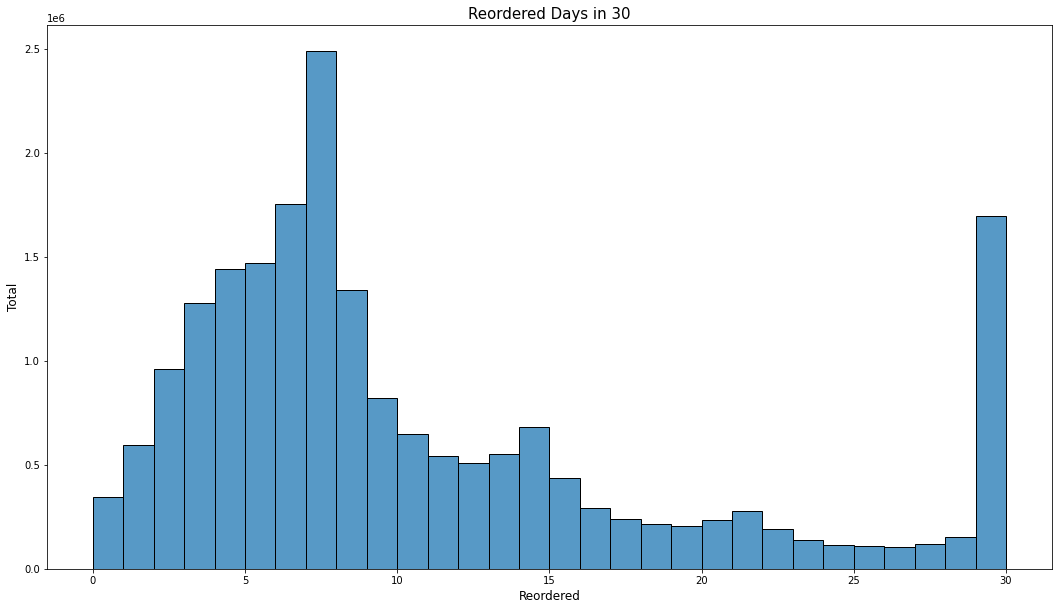

In [ ]:
reorder = or_orsum[or_orsum['reordered']==1]

plt.figure(figsize=(18,10))
dep_hist = sns.histplot(x='days_since_prior_order',
                        bins=30,
                        data=reorder)

dep_hist.set_xlabel('Reordered', fontsize=12)
dep_hist.set_ylabel('Total', fontsize=12)
dep_hist.set_title('Reordered Days in 30', fontsize=15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


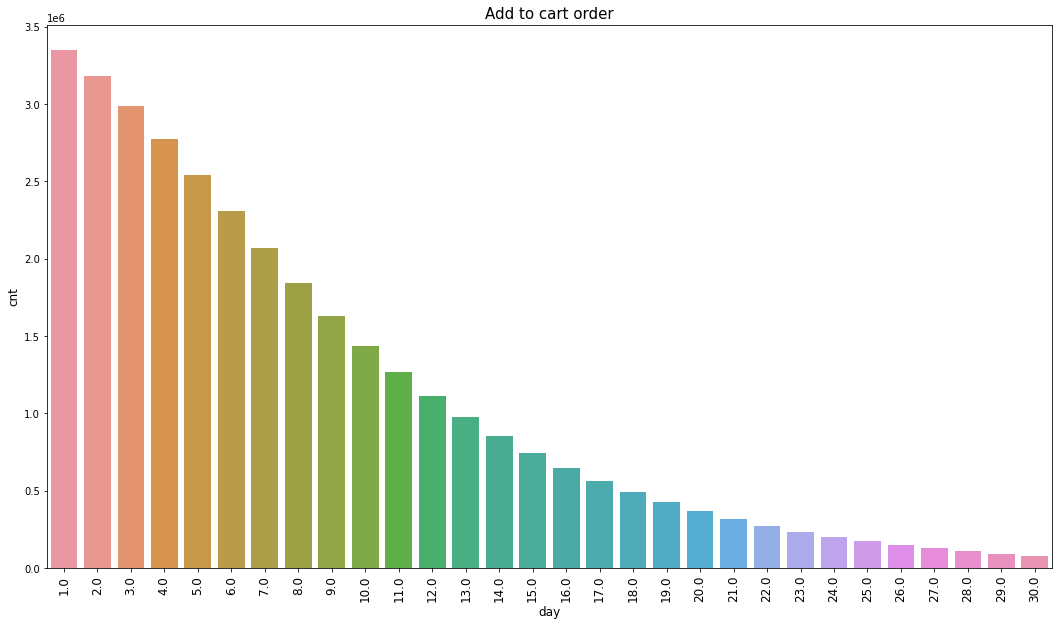

In [ ]:
cartorder = ordersum1.add_to_cart_order.value_counts().head(30)

plt.figure(figsize=(18,10))
sns.barplot(cartorder.index, cartorder.values, alpha = 1)
plt.ylabel('cnt', fontsize = 12)
plt.xlabel('day', fontsize = 12)
plt.xticks(fontsize = 12, rotation = 'vertical')
plt.title('Add to cart order', fontsize = 15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


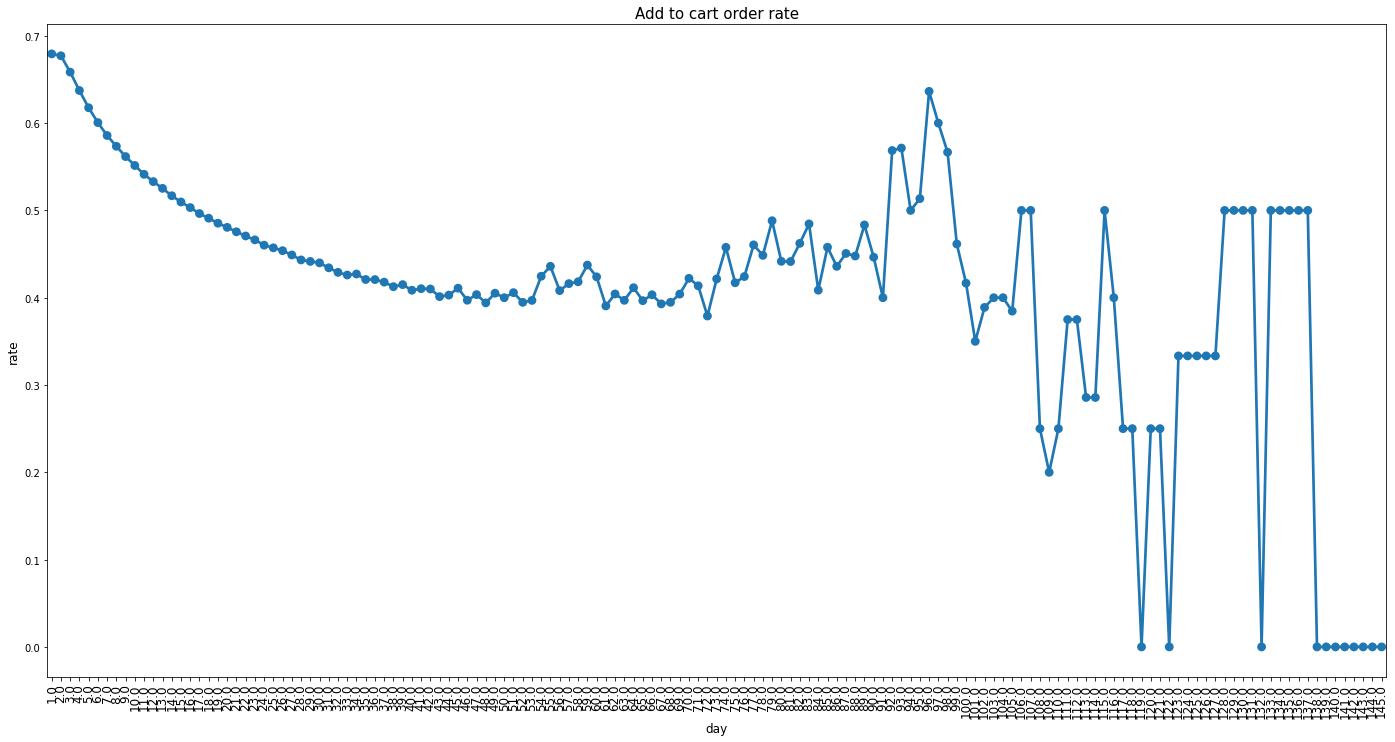

In [ ]:
cartreorder = ordersum1.groupby(['add_to_cart_order'])['reordered'].aggregate('mean').reset_index()
plt.figure(figsize=(24,12))
sns.pointplot(cartreorder['add_to_cart_order'].values, cartreorder['reordered'].values, alpha = 0.8)
plt.ylabel('rate', fontsize = 12)
plt.xlabel('day', fontsize = 12)
plt.xticks(fontsize = 12, rotation = 'vertical')
plt.title('Add to cart order rate', fontsize = 15)
plt.show()


In [ ]:
reorderrate = ordersum2.dropna()

In [ ]:
reorderrate.isnull()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,add_to_cart_order_cnt,department
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33894101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33894102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33894103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33894104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
cartorder = ordersum1.add_to_cart_order.value_counts()
cartorder

1.0      3346083
2.0      3182490
3.0      2988129
4.0      2773069
5.0      2542770
          ...   
141.0          1
142.0          1
143.0          1
144.0          1
145.0          1
Name: add_to_cart_order, Length: 145, dtype: int64